**Problem Statement**: Predicting the retail customer retention potential level as high/medium/low & Customer Segmentation & Pattern extraction

The bussiness problem is to classify customers of a retail company as High/Medium/Low under the target attribute "RetentionPotential" in order to identify those customers who are at risk of leaving and take suitable measures to retain them.

Additionally, the problem aims to segment customers based on their retention potential for strategic purposes. By doing so, the retail company can develop targeted marketing programs and improve customer engagement, thereby increasing customer retention, sales, and profitability.

<hr/>

 **Customer Retential Potential Level** (Classification Task )

<hr/>

### Table of Contents
1. [Overview](#ch1)
1. [Dataset](#ch2)
1. [Merging the files](#ch3)
1. [Analyze and Preprocessing the df](#ch4)
1. [Checking for Outliers, Skewness and Correalation](#ch5)
1. [Train Test Split](#ch6)
1. [Creating & Training the Model](#ch7)
1. [Evaluation on Test Data](#ch8)
1. [Predicting the Customer Retential Potential Level](#ch9)
1. [Pickle file](#ch10)
1. [Clustering](#ch11)

<a id="ch1"></a>
## Overview 
<hr/>

One of the objectives of this notebook is to **show step-by-step how analyzing the dataset to Customer Retential Potential Level.**






The following questions will be answered throughout the Kernel by using the dataset ***df***:
* ***Which features are available in the dataset?***
* ***Which features are categorical?***
* ***Which features are numerical?***
* ***Which features contain blank, null or empty values?***
* ***What are the data types for various features?***
* ***What is the distribution of numerical feature values across the samples?***
* ***Which features are more correlated to the price?***

<a id="ch1"></a>
## Dataset 
<hr/>


**Customer Retential Potential dataset** Give some attributes we have to predict the **Customer Retential Potential level**.

There are 18 attributes which represents the following -

**CustomerID:** A unique identifier assigned to each customer in the database.

**City:** The city where the customer is located. 

**OnlineCommunication**: A binary variable that indicates whether the customer has communicated with the company online.

**AutomaticRefill:** A binary variable that indicates whether the customer has opted for automatic refill of their orders.

**DoorstepDelivery:** A binary variable that indicates whether the customer has opted for doorstep delivery of their orders.

**PreferredDeliveryDay:** The day of the week on which the customer prefers to receive their orders.

**Welcome_email_opened:** A binary variable that indicates whether the customer has opened the welcome email sent by the company.

**No_of_customized_email:** The number of customized emails sent to the customer.

**No_of_customized_email_opened:** The number of customized emails opened by the customer.

**No_of_customized_email_clicked:** The number of links clicked by the customer in the customized emails.

**RetentionPotential**: A classification that predicts the likelihood of the customer to continue using the company's services.

**TotalOrderQuantity:** The total quantity of orders placed by the customer.

**OrderFrequency:** The frequency of orders placed by the customer.

**Average_Ordergap:** The average time between orders placed by the customer.

**no_of_BusinessDays:** The number of business days between orders placed by the customer.

**DateOfRegistration:** The date on which the customer registered with the company or created an account.

**DateOfOrder:** The date on which the customer placed an order or made a purchase.

**Timestamp:** A column that contains the exact date and time at which an event occurred.

#Importing the libraries

In [ ]:
# Importing the useful librairies
import pandas as pd
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the data

In [ ]:
train=pd.read_excel("/content/drive/MyDrive/Hackathon/Train.xlsx")
transaction=pd.read_excel("/content/drive/MyDrive/Hackathon/transactionsdata_Train.xlsx")
customer=pd.read_excel("/content/drive/MyDrive/Hackathon/Customerdata_Train.xlsx")
email=pd.read_excel("/content/drive/MyDrive/Hackathon/Emaildata_Train.xlsx")
print(train.shape)
print(transaction.shape)
print(customer.shape)
print(email.shape)

(23820, 2)
(104755, 4)
(23820, 7)
(517672, 6)


## Train


In [ ]:
train.head()

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High


In [ ]:
train.isnull().sum()

CustomerID            0
RetentionPotential    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          23820 non-null  object
 1   RetentionPotential  23820 non-null  object
dtypes: object(2)
memory usage: 372.3+ KB


In [ ]:
train.nunique()

CustomerID            23820
RetentionPotential        3
dtype: int64

In [ ]:
train.describe()

,CustomerID,RetentionPotential
count,23820,23820
unique,23820,3
top,C37869,Low
freq,1,19185


In [ ]:
train['CustomerID'].duplicated().sum()

0

## Customer

In [ ]:
customer.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday


In [ ]:
customer.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23820 entries, 0 to 23819
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            23820 non-null  object        
 1   City                  23820 non-null  object        
 2   DateOfRegistration    23820 non-null  datetime64[ns]
 3   OnlineCommunication   23820 non-null  int64         
 4   AutomaticRefill       23820 non-null  int64         
 5   DoorstepDelivery      23820 non-null  int64         
 6   PreferredDeliveryDay  23820 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 1.3+ MB


In [ ]:
customer.nunique()

CustomerID              23820
City                        4
DateOfRegistration       2673
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
dtype: int64

In [ ]:
customer.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,23820.000000,23820.000000,23820.000000
mean,0.660411,0.094710,0.037615
std,0.473580,0.292821,0.190268
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
customer['CustomerID'].duplicated().sum()

0

## Transaction


In [ ]:
transaction.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81


In [ ]:
transaction.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104755 entries, 0 to 104754
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CustomerID     104755 non-null  object
 1   DateOfOrder    104755 non-null  object
 2   timestamp      104755 non-null  object
 3   OrderQuantity  104755 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.2+ MB


In [ ]:
transaction.nunique()

CustomerID       23820
DateOfOrder       3151
timestamp        21399
OrderQuantity      451
dtype: int64

In [ ]:
transaction.describe()

,OrderQuantity
count,104755.000000
mean,81.319059
std,46.853569
min,0.000000
25%,50.000000
50%,71.000000
75%,100.000000
max,1501.000000


In [ ]:
transaction['CustomerID'].duplicated().sum()

80935

In [ ]:
transaction_df=transaction.drop(["timestamp"],axis=1)

##Email

In [ ]:
email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable


In [ ]:
email.shape

(517672, 6)

In [ ]:
email.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [ ]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517672 entries, 0 to 517671
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   517672 non-null  object
 1   DateOfemail  517672 non-null  object
 2   EmailType    517672 non-null  object
 3   timestamp    517672 non-null  object
 4   MailOpened   517672 non-null  object
 5   MailClicked  517672 non-null  object
dtypes: object(6)
memory usage: 23.7+ MB


In [ ]:
email.nunique()

CustomerID     23820
DateOfemail     3382
EmailType          2
timestamp      14369
MailOpened         2
MailClicked        3
dtype: int64

In [ ]:
email.describe()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
count,517672,517672,517672,517672,517672,517672
unique,23820,3382,2,14369,2,3
top,C41705,2013-10-11,CustomizedEmail,15:14:02,no,no
freq,292,2139,493852,64,369812,466011


In [ ]:
email['CustomerID'].duplicated().sum()

493852

In [ ]:
email_df=email.drop(['timestamp'],axis=1)
email_df

,CustomerID,DateOfemail,EmailType,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,yes,NotApplicable
...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,no,no
517669,C36140,2018-01-20,CustomizedEmail,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,yes,no


## Merging the files by using the merge

In [ ]:
df_1=customer.merge(email_df,on='CustomerID', how='inner') # merging customer and email_df based on CustomerID
df_1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,yes,NotApplicable
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,yes,no
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,yes,no
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,yes,no
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,yes,no


In [ ]:
df_1.shape

(517672, 11)

In [ ]:
df_1.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
dtype: int64

In [ ]:
df_2=train.merge(transaction_df,on='CustomerID', how='inner') # merging train and transaction_df based on CustomerID
df_2.head()

,CustomerID,RetentionPotential,DateOfOrder,OrderQuantity
0,C37869,Low,2011-07-27,119
1,C37869,Low,2013-05-22,111
2,C37869,Low,2012-06-16,128
3,C37869,Low,2013-05-06,120
4,C37869,Low,2012-04-02,110


In [ ]:
df_2.shape

(104755, 4)

In [ ]:
df_2.isnull().sum()

CustomerID            0
RetentionPotential    0
DateOfOrder           0
OrderQuantity         0
dtype: int64

In [ ]:
df=df_1.merge(df_2,on='CustomerID', how='inner') # merging df_1 and df_2 based on CustomerID
df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked,RetentionPotential,DateOfOrder,OrderQuantity
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,yes,NotApplicable,High,2013-08-11,15
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,yes,no,High,2013-08-11,15
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,yes,no,High,2013-08-11,15
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,yes,no,High,2013-08-11,15
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,yes,no,High,2013-08-11,15


In [ ]:
df.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
RetentionPotential      0
DateOfOrder             0
OrderQuantity           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883469 entries, 0 to 3883468
Data columns (total 14 columns):
 #   Column                Dtype         
---  ------                -----         
 0   CustomerID            object        
 1   City                  object        
 2   DateOfRegistration    datetime64[ns]
 3   OnlineCommunication   int64         
 4   AutomaticRefill       int64         
 5   DoorstepDelivery      int64         
 6   PreferredDeliveryDay  object        
 7   DateOfemail           object        
 8   EmailType             object        
 9   MailOpened            object        
 10  MailClicked           object        
 11  RetentionPotential    object        
 12  DateOfOrder           object        
 13  OrderQuantity         int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 444.4+ MB


In [ ]:
# Taking the samples of data which represents the total data
df=df.sample(3883469,replace=True,random_state=123).drop_duplicates(subset='CustomerID')
df

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked,RetentionPotential,DateOfOrder,OrderQuantity
773630,C32109,CITY2,2011-02-04,1,0,0,Friday,2013-09-21,CustomizedEmail,no,no,Low,2012-10-23,89
277869,C32893,CITY4,2011-10-14,0,0,0,Friday,2012-04-22,CustomizedEmail,yes,yes,Low,2012-03-16,33
28030,C40881,CITY2,2010-09-22,0,0,1,Friday,2011-02-06,CustomizedEmail,yes,yes,Low,2012-01-24,88
3163458,C12364,CITY4,2014-11-09,0,0,0,Tuesday,2017-01-04,CustomizedEmail,yes,no,Low,2016-10-10,81
1241052,C28289,CITY2,2010-02-10,1,1,0,Monday,2012-08-09,CustomizedEmail,no,no,Medium,2010-09-08,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816603,C20462,CITY3,2013-09-18,1,0,0,Monday,2013-09-18,WelcomeEmail,yes,NotApplicable,Low,2013-09-18,41
3075834,C41356,CITY2,2013-11-17,1,1,0,Monday,2013-11-17,WelcomeEmail,yes,NotApplicable,Low,2013-11-17,41
2959214,C23469,CITY4,2013-10-11,1,0,0,Tuesday,2013-10-11,WelcomeEmail,yes,NotApplicable,Low,2013-10-11,41
834375,C25868,CITY2,2010-06-22,0,0,0,Monday,2010-06-22,WelcomeEmail,yes,NotApplicable,High,2013-03-22,51


In [ ]:
train_ids=df['CustomerID']

In [ ]:
train_ids

773630     C32109
277869     C32893
28030      C40881
3163458    C12364
1241052    C28289
            ...  
2816603    C20462
3075834    C41356
2959214    C23469
834375     C25868
3133825    C39840
Name: CustomerID, Length: 20538, dtype: object

## Preprocessing the df

In [ ]:
df.shape

(20538, 14)

In [ ]:
df.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
RetentionPotential      0
DateOfOrder             0
OrderQuantity           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20538 entries, 773630 to 3133825
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            20538 non-null  object        
 1   City                  20538 non-null  object        
 2   DateOfRegistration    20538 non-null  datetime64[ns]
 3   OnlineCommunication   20538 non-null  int64         
 4   AutomaticRefill       20538 non-null  int64         
 5   DoorstepDelivery      20538 non-null  int64         
 6   PreferredDeliveryDay  20538 non-null  object        
 7   DateOfemail           20538 non-null  object        
 8   EmailType             20538 non-null  object        
 9   MailOpened            20538 non-null  object        
 10  MailClicked           20538 non-null  object        
 11  RetentionPotential    20538 non-null  object        
 12  DateOfOrder           20538 non-null  object        
 13  OrderQuan

In [ ]:
df.nunique()

CustomerID              20538
City                        4
DateOfRegistration       2616
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
DateOfemail              2554
EmailType                   2
MailOpened                  2
MailClicked                 3
RetentionPotential          3
DateOfOrder              2370
OrderQuantity             309
dtype: int64

In [ ]:
df.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity
count,20538.000000,20538.000000,20538.000000,20538.000000
mean,0.646314,0.094703,0.039488,63.970348
std,0.478125,0.292811,0.194757,38.644482
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,41.000000
50%,1.000000,0.000000,0.000000,52.000000
75%,1.000000,0.000000,0.000000,78.000000
max,1.000000,1.000000,1.000000,698.000000


In [ ]:
df.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay',
       'DateOfemail', 'EmailType', 'MailOpened', 'MailClicked',
       'RetentionPotential', 'DateOfOrder', 'OrderQuantity'],
      dtype='object')

In [ ]:
df['DateOfRegistration'] = pd.to_datetime(df['DateOfRegistration'],infer_datetime_format=True)# changing data dtype to datatime64
df['year_reg'] =df['DateOfRegistration'].dt.year
df['month_reg']=df['DateOfRegistration'].dt.month
df['day_reg'] =df['DateOfRegistration'].dt.day


In [ ]:
df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked,RetentionPotential,DateOfOrder,OrderQuantity,year_reg,month_reg,day_reg
773630,C32109,CITY2,2011-02-04,1,0,0,Friday,2013-09-21,CustomizedEmail,no,no,Low,2012-10-23,89,2011,2,4
277869,C32893,CITY4,2011-10-14,0,0,0,Friday,2012-04-22,CustomizedEmail,yes,yes,Low,2012-03-16,33,2011,10,14
28030,C40881,CITY2,2010-09-22,0,0,1,Friday,2011-02-06,CustomizedEmail,yes,yes,Low,2012-01-24,88,2010,9,22
3163458,C12364,CITY4,2014-11-09,0,0,0,Tuesday,2017-01-04,CustomizedEmail,yes,no,Low,2016-10-10,81,2014,11,9
1241052,C28289,CITY2,2010-02-10,1,1,0,Monday,2012-08-09,CustomizedEmail,no,no,Medium,2010-09-08,87,2010,2,10


In [ ]:
df['DateOfOrder'] = pd.to_datetime(df['DateOfOrder'],infer_datetime_format=True)# changing data dtype to datatime64
df['year_order'] =df['DateOfOrder'].dt.year
df['month_order']=df['DateOfOrder'].dt.month
df['day_order'] =df['DateOfOrder'].dt.day

In [ ]:
df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked,RetentionPotential,DateOfOrder,OrderQuantity,year_reg,month_reg,day_reg,year_order,month_order,day_order
773630,C32109,CITY2,2011-02-04,1,0,0,Friday,2013-09-21,CustomizedEmail,no,no,Low,2012-10-23,89,2011,2,4,2012,10,23
277869,C32893,CITY4,2011-10-14,0,0,0,Friday,2012-04-22,CustomizedEmail,yes,yes,Low,2012-03-16,33,2011,10,14,2012,3,16
28030,C40881,CITY2,2010-09-22,0,0,1,Friday,2011-02-06,CustomizedEmail,yes,yes,Low,2012-01-24,88,2010,9,22,2012,1,24
3163458,C12364,CITY4,2014-11-09,0,0,0,Tuesday,2017-01-04,CustomizedEmail,yes,no,Low,2016-10-10,81,2014,11,9,2016,10,10
1241052,C28289,CITY2,2010-02-10,1,1,0,Monday,2012-08-09,CustomizedEmail,no,no,Medium,2010-09-08,87,2010,2,10,2010,9,8


In [ ]:
df['DateOfemail'] = pd.to_datetime(df['DateOfemail'],infer_datetime_format=True)# changing data dtype to datatime64
df['year_email'] =df['DateOfemail'].dt.year
df['month_email']=df['DateOfemail'].dt.month
df['day_email'] =df['DateOfemail'].dt.day

In [ ]:
df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,...,OrderQuantity,year_reg,month_reg,day_reg,year_order,month_order,day_order,year_email,month_email,day_email
773630,C32109,CITY2,2011-02-04,1,0,0,Friday,2013-09-21,CustomizedEmail,no,...,89,2011,2,4,2012,10,23,2013,9,21
277869,C32893,CITY4,2011-10-14,0,0,0,Friday,2012-04-22,CustomizedEmail,yes,...,33,2011,10,14,2012,3,16,2012,4,22
28030,C40881,CITY2,2010-09-22,0,0,1,Friday,2011-02-06,CustomizedEmail,yes,...,88,2010,9,22,2012,1,24,2011,2,6
3163458,C12364,CITY4,2014-11-09,0,0,0,Tuesday,2017-01-04,CustomizedEmail,yes,...,81,2014,11,9,2016,10,10,2017,1,4
1241052,C28289,CITY2,2010-02-10,1,1,0,Monday,2012-08-09,CustomizedEmail,no,...,87,2010,2,10,2010,9,8,2012,8,9


In [ ]:
df=df.drop(['DateOfRegistration','DateOfOrder','DateOfemail'],axis=1)

In [ ]:
df.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,RetentionPotential,OrderQuantity,year_reg,month_reg,day_reg,year_order,month_order,day_order,year_email,month_email,day_email
773630,C32109,CITY2,1,0,0,Friday,CustomizedEmail,no,no,Low,89,2011,2,4,2012,10,23,2013,9,21
277869,C32893,CITY4,0,0,0,Friday,CustomizedEmail,yes,yes,Low,33,2011,10,14,2012,3,16,2012,4,22
28030,C40881,CITY2,0,0,1,Friday,CustomizedEmail,yes,yes,Low,88,2010,9,22,2012,1,24,2011,2,6
3163458,C12364,CITY4,0,0,0,Tuesday,CustomizedEmail,yes,no,Low,81,2014,11,9,2016,10,10,2017,1,4
1241052,C28289,CITY2,1,1,0,Monday,CustomizedEmail,no,no,Medium,87,2010,2,10,2010,9,8,2012,8,9


In [ ]:
df.shape

(20538, 20)

In [ ]:
df.columns

Index(['CustomerID', 'City', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'PreferredDeliveryDay', 'EmailType', 'MailOpened',
       'MailClicked', 'RetentionPotential', 'OrderQuantity', 'year_reg',
       'month_reg', 'day_reg', 'year_order', 'month_order', 'day_order',
       'year_email', 'month_email', 'day_email'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20538 entries, 773630 to 3133825
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            20538 non-null  object
 1   City                  20538 non-null  object
 2   OnlineCommunication   20538 non-null  int64 
 3   AutomaticRefill       20538 non-null  int64 
 4   DoorstepDelivery      20538 non-null  int64 
 5   PreferredDeliveryDay  20538 non-null  object
 6   EmailType             20538 non-null  object
 7   MailOpened            20538 non-null  object
 8   MailClicked           20538 non-null  object
 9   RetentionPotential    20538 non-null  object
 10  OrderQuantity         20538 non-null  int64 
 11  year_reg              20538 non-null  int64 
 12  month_reg             20538 non-null  int64 
 13  day_reg               20538 non-null  int64 
 14  year_order            20538 non-null  int64 
 15  month_order           20538 n

Counter({'Tuesday': 4670, 'Monday': 4590, 'Friday': 3505, 'Thursday': 3442, 'Wednesday': 3302, 'Saturday': 862, 'Sunday': 167})


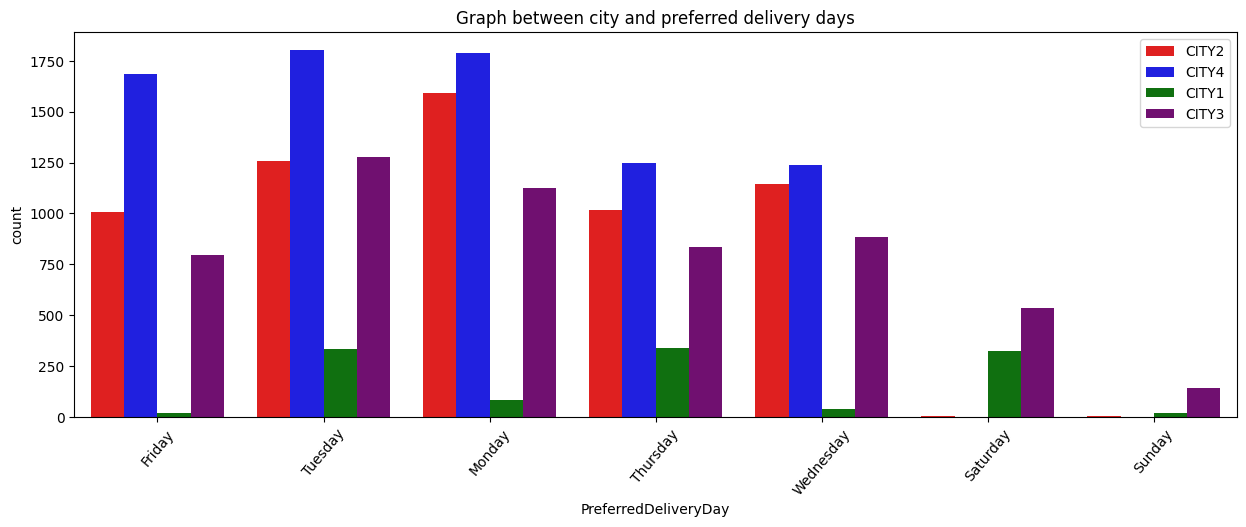

In [ ]:
# Observing the PreferredDeliveryDay.
from collections import Counter
a = Counter(df['PreferredDeliveryDay'])
print(a)
plt.figure(figsize=(15,5))
plt.xticks(fontsize=10, rotation=50)
plt.title('Graph between city and preferred delivery days')
sns.countplot(x ='PreferredDeliveryDay', data=df, hue='City', palette=['red','blue','green','purple'])
plt.legend(loc='upper right')
plt.show()

In [ ]:
df= pd.get_dummies(df, columns=['City','EmailType'])
df.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailOpened,MailClicked,RetentionPotential,OrderQuantity,year_reg,...,day_order,year_email,month_email,day_email,City_CITY1,City_CITY2,City_CITY3,City_CITY4,EmailType_CustomizedEmail,EmailType_WelcomeEmail
773630,C32109,1,0,0,Friday,no,no,Low,89,2011,...,23,2013,9,21,0,1,0,0,1,0
277869,C32893,0,0,0,Friday,yes,yes,Low,33,2011,...,16,2012,4,22,0,0,0,1,1,0
28030,C40881,0,0,1,Friday,yes,yes,Low,88,2010,...,24,2011,2,6,0,1,0,0,1,0
3163458,C12364,0,0,0,Tuesday,yes,no,Low,81,2014,...,10,2017,1,4,0,0,0,1,1,0
1241052,C28289,1,1,0,Monday,no,no,Medium,87,2010,...,8,2012,8,9,0,1,0,0,1,0


In [ ]:
#applying label encoding technique 
from sklearn.preprocessing import LabelEncoder
# use LabelEncoder to convert 'retention_potential' and PreferredDeliveryDay to numeric values
le = LabelEncoder()
df['RetentionPotential_num'] = le.fit_transform(df['RetentionPotential'])
df['PreferredDeliveryDay_num'] = le.fit_transform(df['PreferredDeliveryDay'])
df['MailOpened'] = le.fit_transform(df['MailOpened'])
df['MailClicked'] = le.fit_transform(df['MailClicked'])


In [ ]:
df.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailOpened,MailClicked,RetentionPotential,OrderQuantity,year_reg,...,month_email,day_email,City_CITY1,City_CITY2,City_CITY3,City_CITY4,EmailType_CustomizedEmail,EmailType_WelcomeEmail,RetentionPotential_num,PreferredDeliveryDay_num
773630,C32109,1,0,0,Friday,0,1,Low,89,2011,...,9,21,0,1,0,0,1,0,1,0
277869,C32893,0,0,0,Friday,1,2,Low,33,2011,...,4,22,0,0,0,1,1,0,1,0
28030,C40881,0,0,1,Friday,1,2,Low,88,2010,...,2,6,0,1,0,0,1,0,1,0
3163458,C12364,0,0,0,Tuesday,1,1,Low,81,2014,...,1,4,0,0,0,1,1,0,1,5
1241052,C28289,1,1,0,Monday,0,1,Medium,87,2010,...,8,9,0,1,0,0,1,0,2,1


In [ ]:
#Droping RetentionPotential and CustomerID because it does not contain any useful information
df=df.drop(['RetentionPotential','PreferredDeliveryDay','City_CITY4','CustomerID'],axis=1)
df.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,MailOpened,MailClicked,OrderQuantity,year_reg,month_reg,day_reg,year_order,...,year_email,month_email,day_email,City_CITY1,City_CITY2,City_CITY3,EmailType_CustomizedEmail,EmailType_WelcomeEmail,RetentionPotential_num,PreferredDeliveryDay_num
773630,1,0,0,0,1,89,2011,2,4,2012,...,2013,9,21,0,1,0,1,0,1,0
277869,0,0,0,1,2,33,2011,10,14,2012,...,2012,4,22,0,0,0,1,0,1,0
28030,0,0,1,1,2,88,2010,9,22,2012,...,2011,2,6,0,1,0,1,0,1,0
3163458,0,0,0,1,1,81,2014,11,9,2016,...,2017,1,4,0,0,0,1,0,1,5
1241052,1,1,0,0,1,87,2010,2,10,2010,...,2012,8,9,0,1,0,1,0,2,1


In [ ]:
df.shape

(20538, 22)

# Checking for Outliers, Skewness and Correalation 

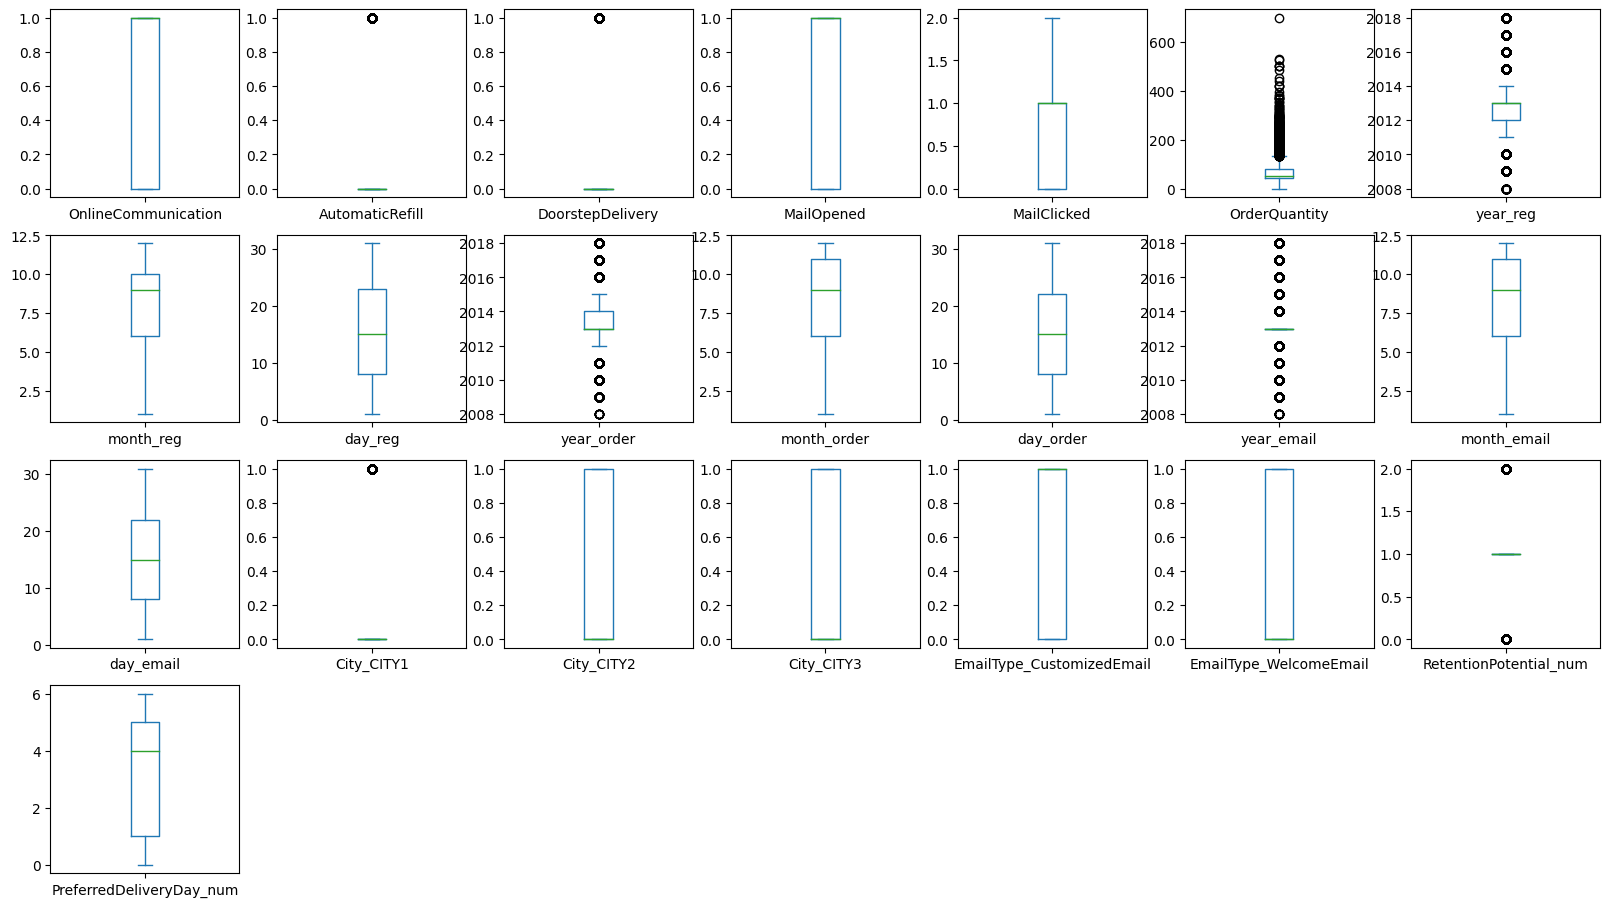

In [ ]:
df.plot(kind='box',subplots=True,layout=(7,7),figsize=(20,20))
plt.show()

Got the more outliers for continuous columns 
 

In [ ]:
#checking the skewness for the columns having outliers
for column in ['OrderQuantity','year_reg','year_order','year_email']:
    skewness = df[column].skew()
    print(f"The skewness of {column} is {skewness:.2f}")

The skewness of OrderQuantity is 2.87
The skewness of year_reg is 0.59
The skewness of year_order is 0.77
The skewness of year_email is 0.70


In [ ]:
df.columns

Index(['OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'MailOpened', 'MailClicked', 'OrderQuantity', 'year_reg', 'month_reg',
       'day_reg', 'year_order', 'month_order', 'day_order', 'year_email',
       'month_email', 'day_email', 'City_CITY1', 'City_CITY2', 'City_CITY3',
       'EmailType_CustomizedEmail', 'EmailType_WelcomeEmail',
       'RetentionPotential_num', 'PreferredDeliveryDay_num'],
      dtype='object')

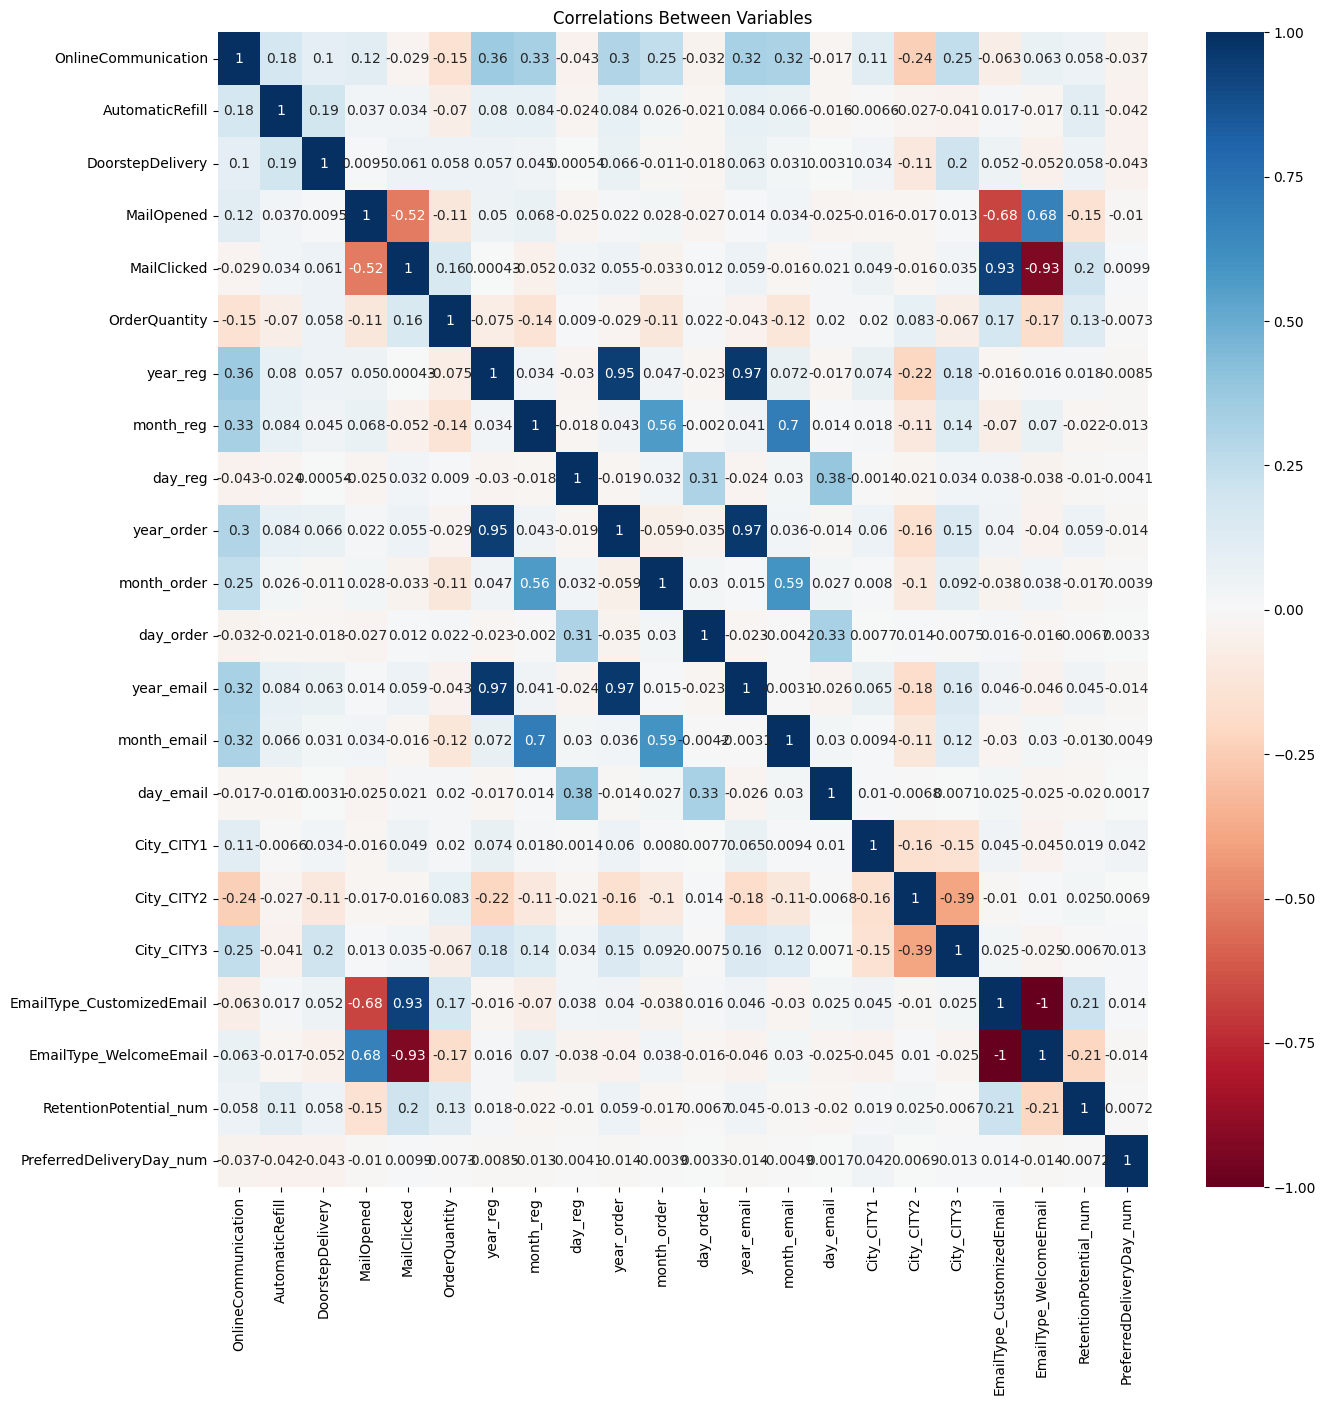

In [ ]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables")
plt.show()

In [ ]:
df=df.drop(['year_reg','year_order','MailClicked'],axis=1)

#  Here we split the data into train data, test data 

In [ ]:
# importing neccessary libraries
from sklearn.model_selection import train_test_split

# splitting of data
X = df.drop(['RetentionPotential_num'],axis=1)
y = df['RetentionPotential_num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14376, 18)
(6162, 18)
(14376,)
(6162,)


Using smote to handle the class imbalance

In [ ]:
# Applying smote to handle the class imbalance
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_train, y_train)

In [ ]:
# Observing the dimensions of X_Smote and y_smote
X_smote.shape

(35409, 18)

In [ ]:
y_smote.shape

(35409,)

Defining the evaluate_model to print the Confusion_matrix, Recall and Precision.

In [ ]:
# Function to evaluate the model metrics.
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix 
    # Creating  a confusion matrix,which compares the act and pred
    cm =confusion_matrix(act, pred)
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    cm_df = pd.DataFrame(cm,index = ['low','high','medium'],columns = ['low','high','medium'])
    #Plotting the confusion matrix
    cm_plot=(plt.figure(figsize=(3,2)),sns.heatmap(cm_df,fmt=".2f", annot=True),plt.title('Confusion Matrix'),plt.ylabel('Actal Values'),plt.xlabel('Predicted Values'),plt.show())
    print("Confusion Matrix \n", cm_plot)
    # Function to evaluate the model metrics.

    from sklearn.metrics import  classification_report
    print( classification_report(act, pred))

# Model building using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier and fit it with train data
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)

# Predict the classes of the training and test datasets
train_pred_rf = clf1.predict(X_train)
test_pred_rf = clf1.predict(X_test)

Train


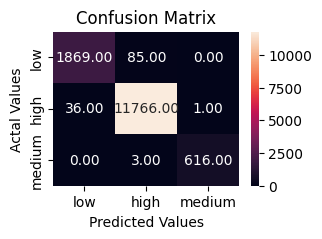

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1954
           1       0.99      1.00      0.99     11803
           2       1.00      1.00      1.00       619

    accuracy                           0.99     14376
   macro avg       0.99      0.98      0.99     14376
weighted avg       0.99      0.99      0.99     14376

Test


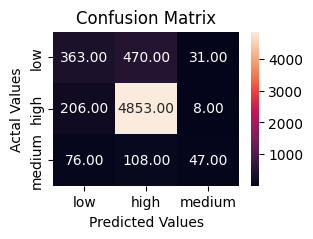

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.56      0.42      0.48       864
           1       0.89      0.96      0.92      5067
           2       0.55      0.20      0.30       231

    accuracy                           0.85      6162
   macro avg       0.67      0.53      0.57      6162
weighted avg       0.83      0.85      0.84      6162



In [ ]:
# Evaluate the recall and precision of the RandomForest classifier on the training and test sets  
print("Train")
evaluate_model(y_train, train_pred_rf)
print("Test")
evaluate_model(y_test, test_pred_rf)

Hyperparameter tunning by using the GridsearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Define the model
model = RandomForestClassifier()

# Define the hyperparameter grid
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# Print the results
print('Best score:', grid_result.best_score_)
print('Best parameters:', grid_result.best_params_)

# Use the best model to make predictions
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model using recall score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)


Best score: 0.855662478079458
Best parameters: {'max_depth': 10, 'n_estimators': 100}
Recall: 0.8589743589743589


In [ ]:
# Create a RandomForestClassifier and fit the model with the best hyperparameters and train data
best_model = RandomForestClassifier(n_estimators=50, max_depth=10)
best_model.fit(X_train, y_train)

# Predict the classes of the training and test datasets
train_pred_rf1 = best_model.predict(X_train)
test_pred_rf1 = best_model.predict(X_test)


Train


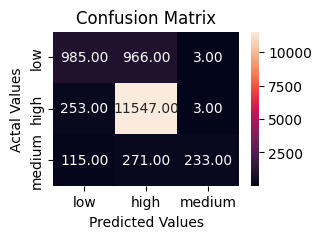

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.73      0.50      0.60      1954
           1       0.90      0.98      0.94     11803
           2       0.97      0.38      0.54       619

    accuracy                           0.89     14376
   macro avg       0.87      0.62      0.69     14376
weighted avg       0.88      0.89      0.88     14376

Test


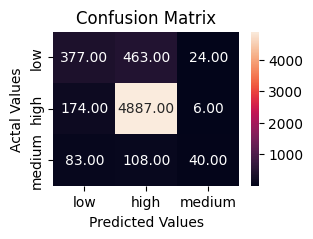

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.59      0.44      0.50       864
           1       0.90      0.96      0.93      5067
           2       0.57      0.17      0.27       231

    accuracy                           0.86      6162
   macro avg       0.69      0.52      0.57      6162
weighted avg       0.84      0.86      0.84      6162



In [ ]:
# Evaluate the recall and precision of the RandomForest classifier on the training and test sets 
print("Train")
evaluate_model(y_train, train_pred_rf1)
print("Test")
evaluate_model(y_test, test_pred_rf1)

Modeling by using the smote

In [ ]:
# Model Building using RandomForestClassifier after applying the smote
smote_rf = RandomForestClassifier(n_estimators=50, max_depth=10)
smote_rf.fit(X_smote, y_smote)

# Predict the classes of the training and test datasets
train_pred_smote_rf = smote_rf.predict(X_smote)
test_pred_smote_rf = smote_rf.predict(X_test)

Train


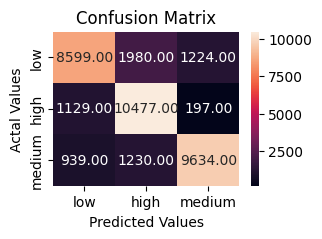

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.81      0.73      0.77     11803
           1       0.77      0.89      0.82     11803
           2       0.87      0.82      0.84     11803

    accuracy                           0.81     35409
   macro avg       0.81      0.81      0.81     35409
weighted avg       0.81      0.81      0.81     35409

Test


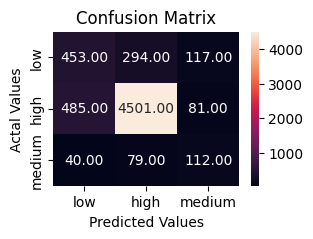

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.46      0.52      0.49       864
           1       0.92      0.89      0.91      5067
           2       0.36      0.48      0.41       231

    accuracy                           0.82      6162
   macro avg       0.58      0.63      0.60      6162
weighted avg       0.84      0.82      0.83      6162



In [ ]:
# Evaluate the recall and precision of the RandomForest classifier on the training and test sets 
print("Train")
evaluate_model(y_smote, train_pred_smote_rf)
print("Test")
evaluate_model(y_test, test_pred_smote_rf)

# Model building by using KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier and fit it with train data
knn_classifier = KNeighborsClassifier(n_neighbors=int(5))
knn_classifier.fit(X_train, y_train)

# Predict the classes of the training and test datasets
train_pred_knn = knn_classifier.predict(X_train)
test_pred_knn = knn_classifier.predict(X_test)

Train


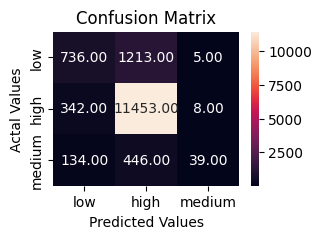

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.61      0.38      0.46      1954
           1       0.87      0.97      0.92     11803
           2       0.75      0.06      0.12       619

    accuracy                           0.85     14376
   macro avg       0.74      0.47      0.50     14376
weighted avg       0.83      0.85      0.82     14376

Test


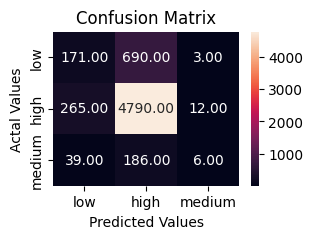

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.36      0.20      0.26       864
           1       0.85      0.95      0.89      5067
           2       0.29      0.03      0.05       231

    accuracy                           0.81      6162
   macro avg       0.50      0.39      0.40      6162
weighted avg       0.76      0.81      0.77      6162



In [ ]:
# Evaluate the recall and precision of the KNN classifier on the training and test sets 
print("Train")
evaluate_model(y_train, train_pred_knn)
print("Test")
evaluate_model(y_test, test_pred_knn)

Hyperparameter tunning by using Gridsearch

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score

# Define the KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

# Perform the grid search
grid = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# Print the results
print('Best score:', grid_result.best_score_)
print('Best parameters:', grid_result.best_params_)

# Use the best model to make predictions
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model using recall score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

Best score: 0.8128132793130556
Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Recall: 0.8138591366439468


In [ ]:
# Create a KNN classifier and fit it with train data
best_model_knn = KNeighborsClassifier(n_neighbors=int(7), weights = 'uniform')
best_model_knn.fit(X_train, y_train)   

# Predict the classes of the training and test datasets
train_pred_knn1 = best_model_knn.predict(X_train)
test_pred_knn1 = best_model_knn.predict(X_test)

Train


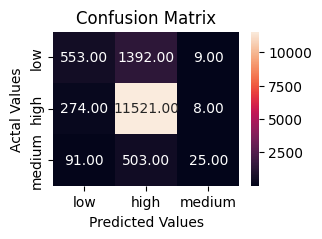

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.60      0.28      0.39      1954
           1       0.86      0.98      0.91     11803
           2       0.60      0.04      0.08       619

    accuracy                           0.84     14376
   macro avg       0.69      0.43      0.46     14376
weighted avg       0.81      0.84      0.81     14376

Test


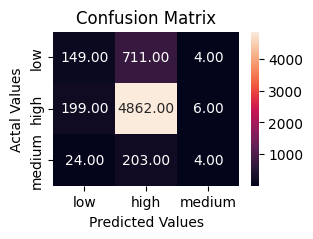

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.40      0.17      0.24       864
           1       0.84      0.96      0.90      5067
           2       0.29      0.02      0.03       231

    accuracy                           0.81      6162
   macro avg       0.51      0.38      0.39      6162
weighted avg       0.76      0.81      0.77      6162



In [ ]:
# Evaluate the recall and precision of the KNN classifier on the training and test sets 
print("Train")
evaluate_model(y_train, train_pred_knn1)
print("Test")
evaluate_model(y_test, test_pred_knn1)

Modelling by using the smote

In [ ]:
# Model Building using KNeighborsClassifier after applying the smote
smote_knn = KNeighborsClassifier(n_neighbors=int(7), weights = 'uniform')
smote_knn.fit(X_smote, y_smote)

# Predict the classes of the training and test datasets
train_pred_smote_knn = smote_knn.predict(X_smote)
test_pred_smote_knn = smote_knn.predict(X_test)

Train


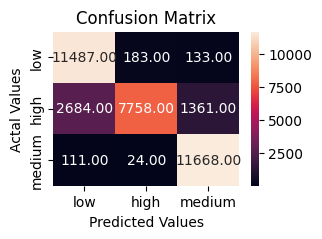

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11803
           1       0.97      0.66      0.78     11803
           2       0.89      0.99      0.93     11803

    accuracy                           0.87     35409
   macro avg       0.89      0.87      0.87     35409
weighted avg       0.89      0.87      0.87     35409

Test


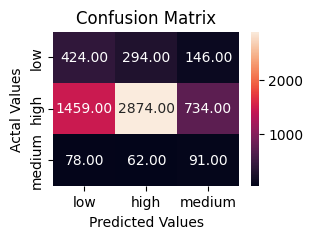

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.22      0.49      0.30       864
           1       0.89      0.57      0.69      5067
           2       0.09      0.39      0.15       231

    accuracy                           0.55      6162
   macro avg       0.40      0.48      0.38      6162
weighted avg       0.77      0.55      0.62      6162



In [ ]:
# Evaluate the recall and precision of the KNeighborsClassifier on the training and test sets 
print("Train")
evaluate_model(y_smote, train_pred_smote_knn)
print("Test")
evaluate_model(y_test, test_pred_smote_knn)

# Model building by using GradientBoostingClassifier.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a KNN classifier and fit it with train data
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

# Predict the classes of the training and test datasets
train_pred_gbc = gbc.predict(X_train)
test_pred_gbc = gbc.predict(X_test)

Train


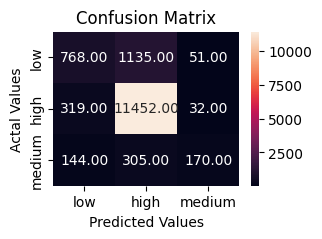

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.62      0.39      0.48      1954
           1       0.89      0.97      0.93     11803
           2       0.67      0.27      0.39       619

    accuracy                           0.86     14376
   macro avg       0.73      0.55      0.60     14376
weighted avg       0.84      0.86      0.84     14376

Test


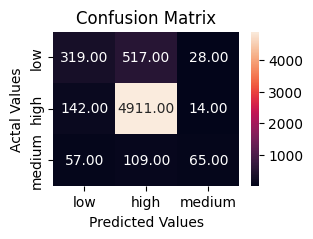

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.62      0.37      0.46       864
           1       0.89      0.97      0.93      5067
           2       0.61      0.28      0.38       231

    accuracy                           0.86      6162
   macro avg       0.70      0.54      0.59      6162
weighted avg       0.84      0.86      0.84      6162



In [ ]:
# Evaluate the recall and precision of the GradientBoostingClassifier on the training and test sets 
print("Train")
evaluate_model(y_train, train_pred_gbc)
print("Test")
evaluate_model(y_test, test_pred_gbc)

Model building by using smote


In [ ]:
# Model Building using GradientboostingClassifier after applying the smote
smote_gbc = GradientBoostingClassifier()
smote_gbc.fit(X_smote, y_smote)

# Predict the classes of the training and test datasets
train_pred_smote_gbc = smote_gbc.predict(X_smote)
test_pred_smote_gbc = smote_gbc.predict(X_test)

Train


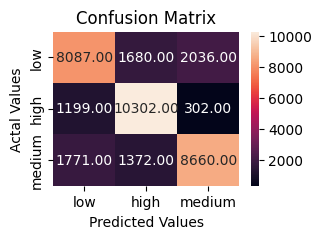

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.73      0.69      0.71     11803
           1       0.77      0.87      0.82     11803
           2       0.79      0.73      0.76     11803

    accuracy                           0.76     35409
   macro avg       0.76      0.76      0.76     35409
weighted avg       0.76      0.76      0.76     35409

Test


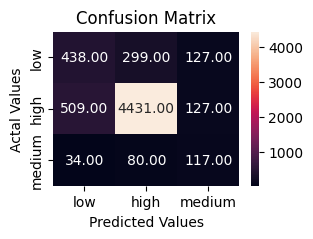

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.45      0.51      0.47       864
           1       0.92      0.87      0.90      5067
           2       0.32      0.51      0.39       231

    accuracy                           0.81      6162
   macro avg       0.56      0.63      0.59      6162
weighted avg       0.83      0.81      0.82      6162



In [ ]:
# Evaluate the recall and precision of the GradientBoostingClassifier on the training and test sets 
print("Train")
evaluate_model(y_smote, train_pred_smote_gbc)
print("Test")
evaluate_model(y_test, test_pred_smote_gbc)

# Model building using AdaBoostClassifier

---



In [ ]:
# Model Building using AdaBoostClassifier 
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

# Predict the classes of the training and test datasets
train_pred_ada = ada.predict(X_train)
test_pred_ada = ada.predict(X_test)

Train


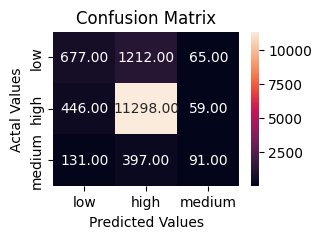

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.54      0.35      0.42      1954
           1       0.88      0.96      0.91     11803
           2       0.42      0.15      0.22       619

    accuracy                           0.84     14376
   macro avg       0.61      0.48      0.52     14376
weighted avg       0.81      0.84      0.82     14376

Test


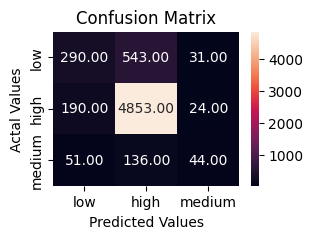

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.55      0.34      0.42       864
           1       0.88      0.96      0.92      5067
           2       0.44      0.19      0.27       231

    accuracy                           0.84      6162
   macro avg       0.62      0.49      0.53      6162
weighted avg       0.81      0.84      0.82      6162



In [ ]:
# Observing the predictions on train and test. 
print("Train")
evaluate_model(y_train, train_pred_ada)
print("Test")
evaluate_model(y_test, test_pred_ada)

Model building by using the smote

In [ ]:
# Model Building using AdaBoostClassifier after applying the smote
smote_ada = AdaBoostClassifier()
smote_ada.fit(X_smote, y_smote)

# Predict the classes of the training and test datasets
train_pred_smote_ada = smote_ada.predict(X_smote)
test_pred_smote_ada = smote_ada.predict(X_test)

Train


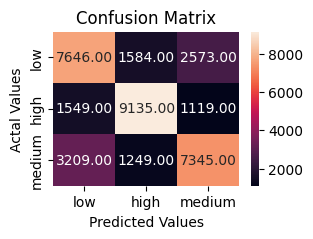

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.62      0.65      0.63     11803
           1       0.76      0.77      0.77     11803
           2       0.67      0.62      0.64     11803

    accuracy                           0.68     35409
   macro avg       0.68      0.68      0.68     35409
weighted avg       0.68      0.68      0.68     35409

Test


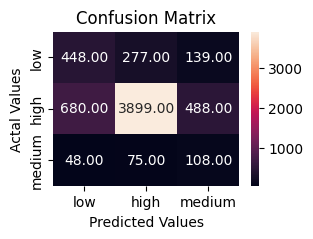

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.38      0.52      0.44       864
           1       0.92      0.77      0.84      5067
           2       0.15      0.47      0.22       231

    accuracy                           0.72      6162
   macro avg       0.48      0.59      0.50      6162
weighted avg       0.81      0.72      0.76      6162



In [ ]:
# Evaluate the recall and precision of the AdaBoostClassifier on the training and test sets 
print("Train")
evaluate_model(y_smote, train_pred_smote_ada)
print("Test")
evaluate_model(y_test, test_pred_smote_ada)

# Model building by using NeuralNetworks

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the training data
train_scaled = scaler.fit_transform(X_train)

In [ ]:
train_scaled

array([[0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.16666667],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.16666667],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.16666667],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.33333333],
       [1.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
X=X_train
Y=y_train

In [ ]:
X.shape[1]

18

In [ ]:
Y.shape[0]

14376

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

optimizer = keras.optimizers.Adam()
loss_fn = keras.losses.CategoricalCrossentropy()
metrics = [keras.metrics.Accuracy()]



In [ ]:
model=Sequential()
model.add(Dense(18,activation='softmax',input_dim=18))
model.add(Dense(18,activation='softmax'))
model.add(Dense(1,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 18)                342       
                                                                 
 dense_4 (Dense)             (None, 18)                342       
                                                                 
 dense_5 (Dense)             (None, 1)                 19        
                                                                 
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# def multi_cross_entropy(y_train, y_test):
#     return tensorflow.keras.backend.categorical_crossentropy(y_train, y_test, from_logits=False)

In [ ]:
# model.compile(optimizer='adam', loss=multi_cross_entropy, metrics=['accuracy'])

In [ ]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)


Epoch 1/50
360/360 [==============================] - 2s 3ms/step - loss: 0.0000e+00 - accuracy: 2.6087e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0014
Epoch 2/50
360/360 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 3.4783e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0014
Epoch 3/50
360/360 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 3.4783e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0014
Epoch 4/50
360/360 [==============================] - 1s 4ms/step - loss: 0.0000e+00 - accuracy: 2.6087e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0014
Epoch 5/50
360/360 [==============================] - 1s 3ms/step - loss: 0.0000e+00 - accuracy: 2.6087e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0014
Epoch 6/50
360/360 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 2.6087e-04 - val_loss: 0.0000e+00 - val_accuracy: 0.0014
Epoch 7/50
360/360 [==============================] - 1s 2ms/step - loss: 0.

In [ ]:
NN_train_pred = np.round(model.predict(X_train)).flatten()
NN_test_pred = np.round(model.predict(X_test)).flatten()

193/193 [==============================] - 0s 1ms/step


Train


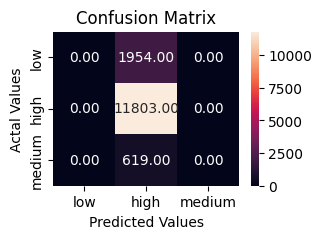

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1954
           1       0.82      1.00      0.90     11803
           2       0.00      0.00      0.00       619

    accuracy                           0.82     14376
   macro avg       0.27      0.33      0.30     14376
weighted avg       0.67      0.82      0.74     14376

Test


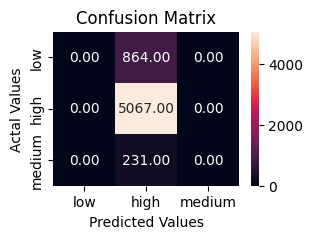

Confusion Matrix 
 (<Figure size 300x200 with 2 Axes>, <Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted Values', ylabel='Actal Values'>, Text(0.5, 1.0, 'Confusion Matrix'), Text(24.000000000000007, 0.5, 'Actal Values'), Text(0.5, 24.0, 'Predicted Values'), None)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       864
           1       0.82      1.00      0.90      5067
           2       0.00      0.00      0.00       231

    accuracy                           0.82      6162
   macro avg       0.27      0.33      0.30      6162
weighted avg       0.68      0.82      0.74      6162



In [ ]:
# Observing the predictions on train and test. 
print("Train")
evaluate_model(y_train, NN_train_pred)
print("Test")
evaluate_model(y_test, NN_test_pred)

# Loading the Test data

In [ ]:
test=pd.read_excel("/content/drive/MyDrive/Hackathon/Test.xlsx")
test_transaction=pd.read_excel("/content/drive/MyDrive/Hackathon/transactionsdata_Test.xlsx")
test_customer=pd.read_excel("/content/drive/MyDrive/Hackathon/Customerdata_Test.xlsx")
test_email=pd.read_excel("/content/drive/MyDrive/Hackathon/Emaildata_Test.xlsx")
print(test.shape)
print(test_transaction.shape)
print(test_customer.shape)
print(test_email.shape)

(5955, 1)
(26768, 4)
(5955, 7)
(129074, 6)


# Test

In [ ]:
test.head()

,CustomerID
0,C12121
1,C12132
2,C12134
3,C12135
4,C12136


In [ ]:
test.isnull().sum()

CustomerID    0
dtype: int64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  5955 non-null   object
dtypes: object(1)
memory usage: 46.6+ KB


In [ ]:
test.nunique()

CustomerID    5955
dtype: int64

In [ ]:
test.describe()

,CustomerID
count,5955
unique,5955
top,C12121
freq,1


In [ ]:
train['CustomerID'].duplicated().sum()

0

# Test_customer

In [ ]:
test_customer.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday


In [ ]:
test_customer.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
dtype: int64

In [ ]:
test_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5955 non-null   object        
 1   City                  5955 non-null   object        
 2   DateOfRegistration    5955 non-null   datetime64[ns]
 3   OnlineCommunication   5955 non-null   int64         
 4   AutomaticRefill       5955 non-null   int64         
 5   DoorstepDelivery      5955 non-null   int64         
 6   PreferredDeliveryDay  5955 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 325.8+ KB


In [ ]:
test_customer.nunique()

CustomerID              5955
City                       4
DateOfRegistration      1631
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
dtype: int64

In [ ]:
test_customer.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery
count,5955.000000,5955.000000,5955.000000
mean,0.659278,0.095046,0.038959
std,0.473992,0.293303,0.193513
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [ ]:
customer['CustomerID'].duplicated().sum()

0

# Test_Transaction

In [ ]:
test_transaction.head()

,CustomerID,DateOfOrder,timestamp,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179


In [ ]:
test_transaction.isnull().sum()

CustomerID       0
DateOfOrder      0
timestamp        0
OrderQuantity    0
dtype: int64

In [ ]:
test_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26768 entries, 0 to 26767
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     26768 non-null  object
 1   DateOfOrder    26768 non-null  object
 2   timestamp      26768 non-null  object
 3   OrderQuantity  26768 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 836.6+ KB


In [ ]:
test_transaction.nunique()

CustomerID        5955
DateOfOrder       2771
timestamp        15326
OrderQuantity      372
dtype: int64

In [ ]:
test_transaction.describe()

,OrderQuantity
count,26768.000000
mean,84.407763
std,50.794616
min,1.000000
25%,51.000000
50%,73.000000
75%,102.000000
max,501.000000


In [ ]:
transaction['CustomerID'].duplicated().sum()

80935

In [ ]:
test_transaction_df=test_transaction.drop(["timestamp"],axis=1)

# Test_Email Data

In [ ]:
test_email.head()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable


In [ ]:
test_email.isnull().sum()

CustomerID     0
DateOfemail    0
EmailType      0
timestamp      0
MailOpened     0
MailClicked    0
dtype: int64

In [ ]:
test_email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129074 entries, 0 to 129073
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CustomerID   129074 non-null  object
 1   DateOfemail  129074 non-null  object
 2   EmailType    129074 non-null  object
 3   timestamp    129074 non-null  object
 4   MailOpened   129074 non-null  object
 5   MailClicked  129074 non-null  object
dtypes: object(6)
memory usage: 5.9+ MB


In [ ]:
test_email.nunique()

CustomerID      5955
DateOfemail     3149
EmailType          2
timestamp      14366
MailOpened         2
MailClicked        3
dtype: int64

In [ ]:
test_email.describe()

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
count,129074,129074,129074,129074,129074,129074
unique,5955,3149,2,14366,2,3
top,C14650,2013-10-02,CustomizedEmail,11:28:48,no,no
freq,280,545,123119,24,92296,116201


In [ ]:
email['CustomerID'].duplicated().sum()

493852

In [ ]:
test_email_df=test_email.drop(['timestamp'],axis=1)
test_email

,CustomerID,DateOfemail,EmailType,timestamp,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable
...,...,...,...,...,...,...
129069,C30169,2018-01-15,CustomizedEmail,13:55:28,no,no
129070,C30169,2018-01-15,CustomizedEmail,15:17:34,no,no
129071,C30169,2018-01-15,CustomizedEmail,10:24:54,yes,yes
129072,C30169,2018-01-15,CustomizedEmail,17:15:26,yes,no


# Merging the files by using the joins

In [ ]:
# merging test_customer and test_email_df based on CustomerID
test_df_1=test_customer.merge(test_email_df,on='CustomerID', how='inner') 
test_df_1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,2010-10-22,WelcomeEmail,yes,NotApplicable
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,yes,NotApplicable
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2012-03-06,CustomizedEmail,yes,no
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2009-10-13,CustomizedEmail,yes,no
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2010-09-09,CustomizedEmail,yes,no


In [ ]:
test_df_1.shape

(129074, 11)

In [ ]:
test_df_1.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
dtype: int64

In [ ]:
# merging test and test_transaction_df based on CustomerID
test_df_2=test.merge(test_transaction_df,on='CustomerID', how='inner') 
test_df_2.head()

,CustomerID,DateOfOrder,OrderQuantity
0,C12121,2017-12-14,52
1,C12132,2013-10-20,40
2,C12134,2013-09-18,40
3,C12135,2018-01-10,41
4,C12136,2013-10-19,79


In [ ]:
test_df_2.shape

(26768, 3)

In [ ]:
test_df_2.isnull().sum()

CustomerID       0
DateOfOrder      0
OrderQuantity    0
dtype: int64

In [ ]:
# merging test_df_1 and test_df_2 based on CustomerID
test_df=test_df_1.merge(test_df_2,on='CustomerID', how='inner') 
test_df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked,DateOfOrder,OrderQuantity
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,2010-10-22,WelcomeEmail,yes,NotApplicable,2011-03-28,55
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,yes,NotApplicable,2010-10-12,174
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,yes,NotApplicable,2010-11-27,171
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,yes,NotApplicable,2011-12-09,166
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,yes,NotApplicable,2011-03-04,179


In [ ]:
# Taking the samples of data which represents the total data
test_df=test_df.sample(3883469,replace=True,random_state=123).drop_duplicates(subset='CustomerID')
test_df

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked,DateOfOrder,OrderQuantity
773630,C39476,CITY3,2013-10-20,1,0,0,Monday,2014-01-07,CustomizedEmail,no,no,2013-11-25,131
277869,C16188,CITY3,2013-03-02,0,1,1,Friday,2013-06-19,CustomizedEmail,no,no,2013-04-26,74
28030,C20577,CITY4,2010-11-16,0,1,0,Monday,2011-09-18,CustomizedEmail,no,no,2012-11-17,68
17730,C14740,CITY2,2010-08-17,0,0,0,Wednesday,2011-01-15,CustomizedEmail,no,no,2011-10-23,40
192476,C16448,CITY4,2011-02-01,1,0,0,Wednesday,2011-08-30,CustomizedEmail,yes,no,2014-01-07,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004273,C41552,CITY4,2017-10-10,1,0,0,Thursday,2017-10-10,WelcomeEmail,yes,NotApplicable,2017-10-10,41
960076,C29735,CITY3,2017-02-24,0,0,0,Tuesday,2017-02-24,WelcomeEmail,yes,NotApplicable,2017-02-24,65
798356,C42064,CITY3,2013-12-03,1,0,0,Tuesday,2013-12-03,WelcomeEmail,yes,NotApplicable,2013-12-03,35
692043,C31697,CITY4,2013-08-02,1,0,0,Monday,2013-08-02,WelcomeEmail,yes,NotApplicable,2013-08-02,120


# Preprocessing the df

In [ ]:
test_df.shape

(5906, 13)

In [ ]:
test_df.isnull().sum()

CustomerID              0
City                    0
DateOfRegistration      0
OnlineCommunication     0
AutomaticRefill         0
DoorstepDelivery        0
PreferredDeliveryDay    0
DateOfemail             0
EmailType               0
MailOpened              0
MailClicked             0
DateOfOrder             0
OrderQuantity           0
dtype: int64

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5906 entries, 773630 to 307282
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            5906 non-null   object        
 1   City                  5906 non-null   object        
 2   DateOfRegistration    5906 non-null   datetime64[ns]
 3   OnlineCommunication   5906 non-null   int64         
 4   AutomaticRefill       5906 non-null   int64         
 5   DoorstepDelivery      5906 non-null   int64         
 6   PreferredDeliveryDay  5906 non-null   object        
 7   DateOfemail           5906 non-null   object        
 8   EmailType             5906 non-null   object        
 9   MailOpened            5906 non-null   object        
 10  MailClicked           5906 non-null   object        
 11  DateOfOrder           5906 non-null   object        
 12  OrderQuantity         5906 non-null   int64         
dtypes: datetime

In [ ]:
test_df.nunique()

CustomerID              5906
City                       4
DateOfRegistration      1627
OnlineCommunication        2
AutomaticRefill            2
DoorstepDelivery           2
PreferredDeliveryDay       7
DateOfemail             1634
EmailType                  2
MailOpened                 2
MailClicked                3
DateOfOrder             1527
OrderQuantity            231
dtype: int64

In [ ]:
test_df.describe()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,OrderQuantity
count,5906.000000,5906.00000,5906.000000,5906.000000
mean,0.658652,0.09448,0.038943,60.909753
std,0.474202,0.29252,0.193477,36.053021
min,0.000000,0.00000,0.000000,1.000000
25%,0.000000,0.00000,0.000000,41.000000
50%,1.000000,0.00000,0.000000,51.000000
75%,1.000000,0.00000,0.000000,73.000000
max,1.000000,1.00000,1.000000,483.000000


In [ ]:
test_df['DateOfRegistration'] = pd.to_datetime(test_df['DateOfRegistration'],infer_datetime_format=True)# changing data dtype to datatime64
test_df['year_reg'] =test_df['DateOfRegistration'].dt.year
test_df['month_reg']=test_df['DateOfRegistration'].dt.month
test_df['day_reg'] =test_df['DateOfRegistration'].dt.day

In [ ]:
test_df.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked,DateOfOrder,OrderQuantity,year_reg,month_reg,day_reg
773630,C39476,CITY3,2013-10-20,1,0,0,Monday,2014-01-07,CustomizedEmail,no,no,2013-11-25,131,2013,10,20
277869,C16188,CITY3,2013-03-02,0,1,1,Friday,2013-06-19,CustomizedEmail,no,no,2013-04-26,74,2013,3,2
28030,C20577,CITY4,2010-11-16,0,1,0,Monday,2011-09-18,CustomizedEmail,no,no,2012-11-17,68,2010,11,16
17730,C14740,CITY2,2010-08-17,0,0,0,Wednesday,2011-01-15,CustomizedEmail,no,no,2011-10-23,40,2010,8,17
192476,C16448,CITY4,2011-02-01,1,0,0,Wednesday,2011-08-30,CustomizedEmail,yes,no,2014-01-07,100,2011,2,1


In [ ]:
test_df=test_df.drop(['DateOfRegistration'],axis=1)

In [ ]:
test_df['DateOfOrder'] = pd.to_datetime(test_df['DateOfOrder'],infer_datetime_format=True)# changing data dtype to datatime64
test_df['year_order'] =test_df['DateOfOrder'].dt.year
test_df['month_order']=test_df['DateOfOrder'].dt.month
test_df['day_order'] =test_df['DateOfOrder'].dt.day

In [ ]:
test_df.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked,DateOfOrder,OrderQuantity,year_reg,month_reg,day_reg,year_order,month_order,day_order
773630,C39476,CITY3,1,0,0,Monday,2014-01-07,CustomizedEmail,no,no,2013-11-25,131,2013,10,20,2013,11,25
277869,C16188,CITY3,0,1,1,Friday,2013-06-19,CustomizedEmail,no,no,2013-04-26,74,2013,3,2,2013,4,26
28030,C20577,CITY4,0,1,0,Monday,2011-09-18,CustomizedEmail,no,no,2012-11-17,68,2010,11,16,2012,11,17
17730,C14740,CITY2,0,0,0,Wednesday,2011-01-15,CustomizedEmail,no,no,2011-10-23,40,2010,8,17,2011,10,23
192476,C16448,CITY4,1,0,0,Wednesday,2011-08-30,CustomizedEmail,yes,no,2014-01-07,100,2011,2,1,2014,1,7


In [ ]:
test_df['DateOfemail'] = pd.to_datetime(test_df['DateOfemail'],infer_datetime_format=True)# changing data dtype to datatime64
test_df['year_email'] =test_df['DateOfemail'].dt.year
test_df['month_email']=test_df['DateOfemail'].dt.month
test_df['day_email'] =test_df['DateOfemail'].dt.day

In [ ]:
test_df.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfemail,EmailType,MailOpened,MailClicked,...,OrderQuantity,year_reg,month_reg,day_reg,year_order,month_order,day_order,year_email,month_email,day_email
773630,C39476,CITY3,1,0,0,Monday,2014-01-07,CustomizedEmail,no,no,...,131,2013,10,20,2013,11,25,2014,1,7
277869,C16188,CITY3,0,1,1,Friday,2013-06-19,CustomizedEmail,no,no,...,74,2013,3,2,2013,4,26,2013,6,19
28030,C20577,CITY4,0,1,0,Monday,2011-09-18,CustomizedEmail,no,no,...,68,2010,11,16,2012,11,17,2011,9,18
17730,C14740,CITY2,0,0,0,Wednesday,2011-01-15,CustomizedEmail,no,no,...,40,2010,8,17,2011,10,23,2011,1,15
192476,C16448,CITY4,1,0,0,Wednesday,2011-08-30,CustomizedEmail,yes,no,...,100,2011,2,1,2014,1,7,2011,8,30


In [ ]:
test_df=test_df.drop(['DateOfemail','DateOfOrder'],axis=1)

In [ ]:
test_df.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,year_reg,month_reg,day_reg,year_order,month_order,day_order,year_email,month_email,day_email
773630,C39476,CITY3,1,0,0,Monday,CustomizedEmail,no,no,131,2013,10,20,2013,11,25,2014,1,7
277869,C16188,CITY3,0,1,1,Friday,CustomizedEmail,no,no,74,2013,3,2,2013,4,26,2013,6,19
28030,C20577,CITY4,0,1,0,Monday,CustomizedEmail,no,no,68,2010,11,16,2012,11,17,2011,9,18
17730,C14740,CITY2,0,0,0,Wednesday,CustomizedEmail,no,no,40,2010,8,17,2011,10,23,2011,1,15
192476,C16448,CITY4,1,0,0,Wednesday,CustomizedEmail,yes,no,100,2011,2,1,2014,1,7,2011,8,30


In [ ]:
test_df.shape

(5906, 19)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5906 entries, 773630 to 307282
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            5906 non-null   object
 1   City                  5906 non-null   object
 2   OnlineCommunication   5906 non-null   int64 
 3   AutomaticRefill       5906 non-null   int64 
 4   DoorstepDelivery      5906 non-null   int64 
 5   PreferredDeliveryDay  5906 non-null   object
 6   EmailType             5906 non-null   object
 7   MailOpened            5906 non-null   object
 8   MailClicked           5906 non-null   object
 9   OrderQuantity         5906 non-null   int64 
 10  year_reg              5906 non-null   int64 
 11  month_reg             5906 non-null   int64 
 12  day_reg               5906 non-null   int64 
 13  year_order            5906 non-null   int64 
 14  month_order           5906 non-null   int64 
 15  day_order             5906 non-

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5906 entries, 773630 to 307282
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            5906 non-null   object
 1   City                  5906 non-null   object
 2   OnlineCommunication   5906 non-null   int64 
 3   AutomaticRefill       5906 non-null   int64 
 4   DoorstepDelivery      5906 non-null   int64 
 5   PreferredDeliveryDay  5906 non-null   object
 6   EmailType             5906 non-null   object
 7   MailOpened            5906 non-null   object
 8   MailClicked           5906 non-null   object
 9   OrderQuantity         5906 non-null   int64 
 10  year_reg              5906 non-null   int64 
 11  month_reg             5906 non-null   int64 
 12  day_reg               5906 non-null   int64 
 13  year_order            5906 non-null   int64 
 14  month_order           5906 non-null   int64 
 15  day_order             5906 non-

In [ ]:
test_df= pd.get_dummies(test_df, columns=['City','EmailType'])
test_df.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailOpened,MailClicked,OrderQuantity,year_reg,month_reg,...,day_order,year_email,month_email,day_email,City_CITY1,City_CITY2,City_CITY3,City_CITY4,EmailType_CustomizedEmail,EmailType_WelcomeEmail
773630,C39476,1,0,0,Monday,no,no,131,2013,10,...,25,2014,1,7,0,0,1,0,1,0
277869,C16188,0,1,1,Friday,no,no,74,2013,3,...,26,2013,6,19,0,0,1,0,1,0
28030,C20577,0,1,0,Monday,no,no,68,2010,11,...,17,2011,9,18,0,0,0,1,1,0
17730,C14740,0,0,0,Wednesday,no,no,40,2010,8,...,23,2011,1,15,0,1,0,0,1,0
192476,C16448,1,0,0,Wednesday,yes,no,100,2011,2,...,7,2011,8,30,0,0,0,1,1,0


In [ ]:
#applying label encoding technique 
from sklearn.preprocessing import LabelEncoder
# use LabelEncoder to convert 'PreferredDeliveryDay' to numeric values
le = LabelEncoder()
test_df['PreferredDeliveryDay_num'] = le.fit_transform(test_df['PreferredDeliveryDay'])
test_df['MailOpened'] = le.fit_transform(test_df['MailOpened'])
test_df['MailClicked'] = le.fit_transform(test_df['MailClicked'])


In [ ]:
test_df.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,MailOpened,MailClicked,OrderQuantity,year_reg,month_reg,...,year_email,month_email,day_email,City_CITY1,City_CITY2,City_CITY3,City_CITY4,EmailType_CustomizedEmail,EmailType_WelcomeEmail,PreferredDeliveryDay_num
773630,C39476,1,0,0,Monday,0,1,131,2013,10,...,2014,1,7,0,0,1,0,1,0,1
277869,C16188,0,1,1,Friday,0,1,74,2013,3,...,2013,6,19,0,0,1,0,1,0,0
28030,C20577,0,1,0,Monday,0,1,68,2010,11,...,2011,9,18,0,0,0,1,1,0,1
17730,C14740,0,0,0,Wednesday,0,1,40,2010,8,...,2011,1,15,0,1,0,0,1,0,6
192476,C16448,1,0,0,Wednesday,1,1,100,2011,2,...,2011,8,30,0,0,0,1,1,0,6


In [ ]:
ids=test_df['CustomerID']
ids

773630     C39476
277869     C16188
28030      C20577
17730      C14740
192476     C16448
            ...  
1004273    C41552
960076     C29735
798356     C42064
692043     C31697
307282     C21003
Name: CustomerID, Length: 5906, dtype: object

In [ ]:
#Droping  columns because it does not contain any useful information
test_df=test_df.drop(['PreferredDeliveryDay','City_CITY4','CustomerID'],axis=1)
test_df.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,MailOpened,MailClicked,OrderQuantity,year_reg,month_reg,day_reg,year_order,...,day_order,year_email,month_email,day_email,City_CITY1,City_CITY2,City_CITY3,EmailType_CustomizedEmail,EmailType_WelcomeEmail,PreferredDeliveryDay_num
773630,1,0,0,0,1,131,2013,10,20,2013,...,25,2014,1,7,0,0,1,1,0,1
277869,0,1,1,0,1,74,2013,3,2,2013,...,26,2013,6,19,0,0,1,1,0,0
28030,0,1,0,0,1,68,2010,11,16,2012,...,17,2011,9,18,0,0,0,1,0,1
17730,0,0,0,0,1,40,2010,8,17,2011,...,23,2011,1,15,0,1,0,1,0,6
192476,1,0,0,1,1,100,2011,2,1,2014,...,7,2011,8,30,0,0,0,1,0,6


# Checking for Outliers, Skewness and Correalation 

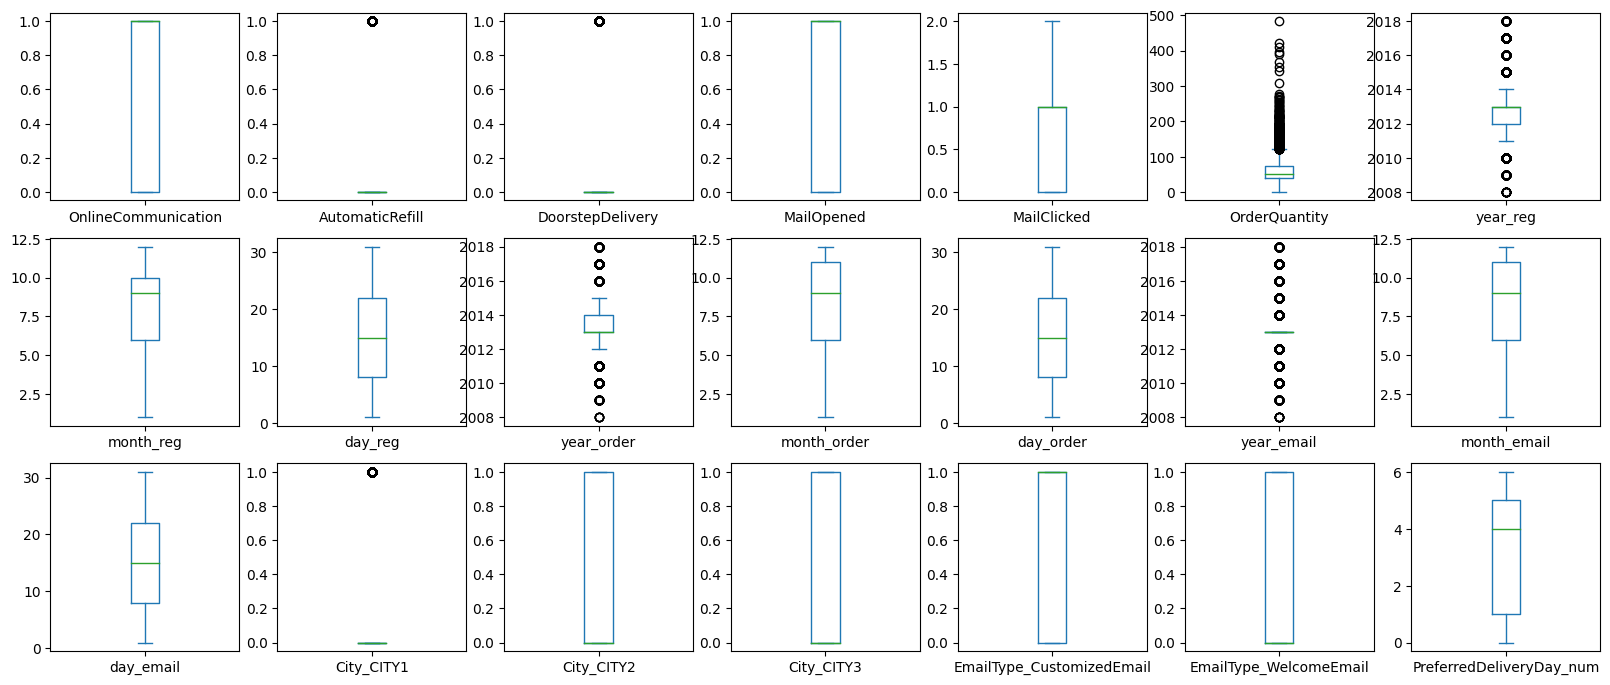

In [ ]:
test_df.plot(kind='box',subplots=True,layout=(7,7),figsize=(20,20))
plt.show()

In [ ]:
#checking the skewness for the columns having outliers
for column in ['OrderQuantity','year_reg','year_order','year_email']:
    skewness = test_df[column].skew()
    print(f"The skewness of {column} is {skewness:.2f}")

The skewness of OrderQuantity is 2.85
The skewness of year_reg is 0.58
The skewness of year_order is 0.73
The skewness of year_email is 0.66


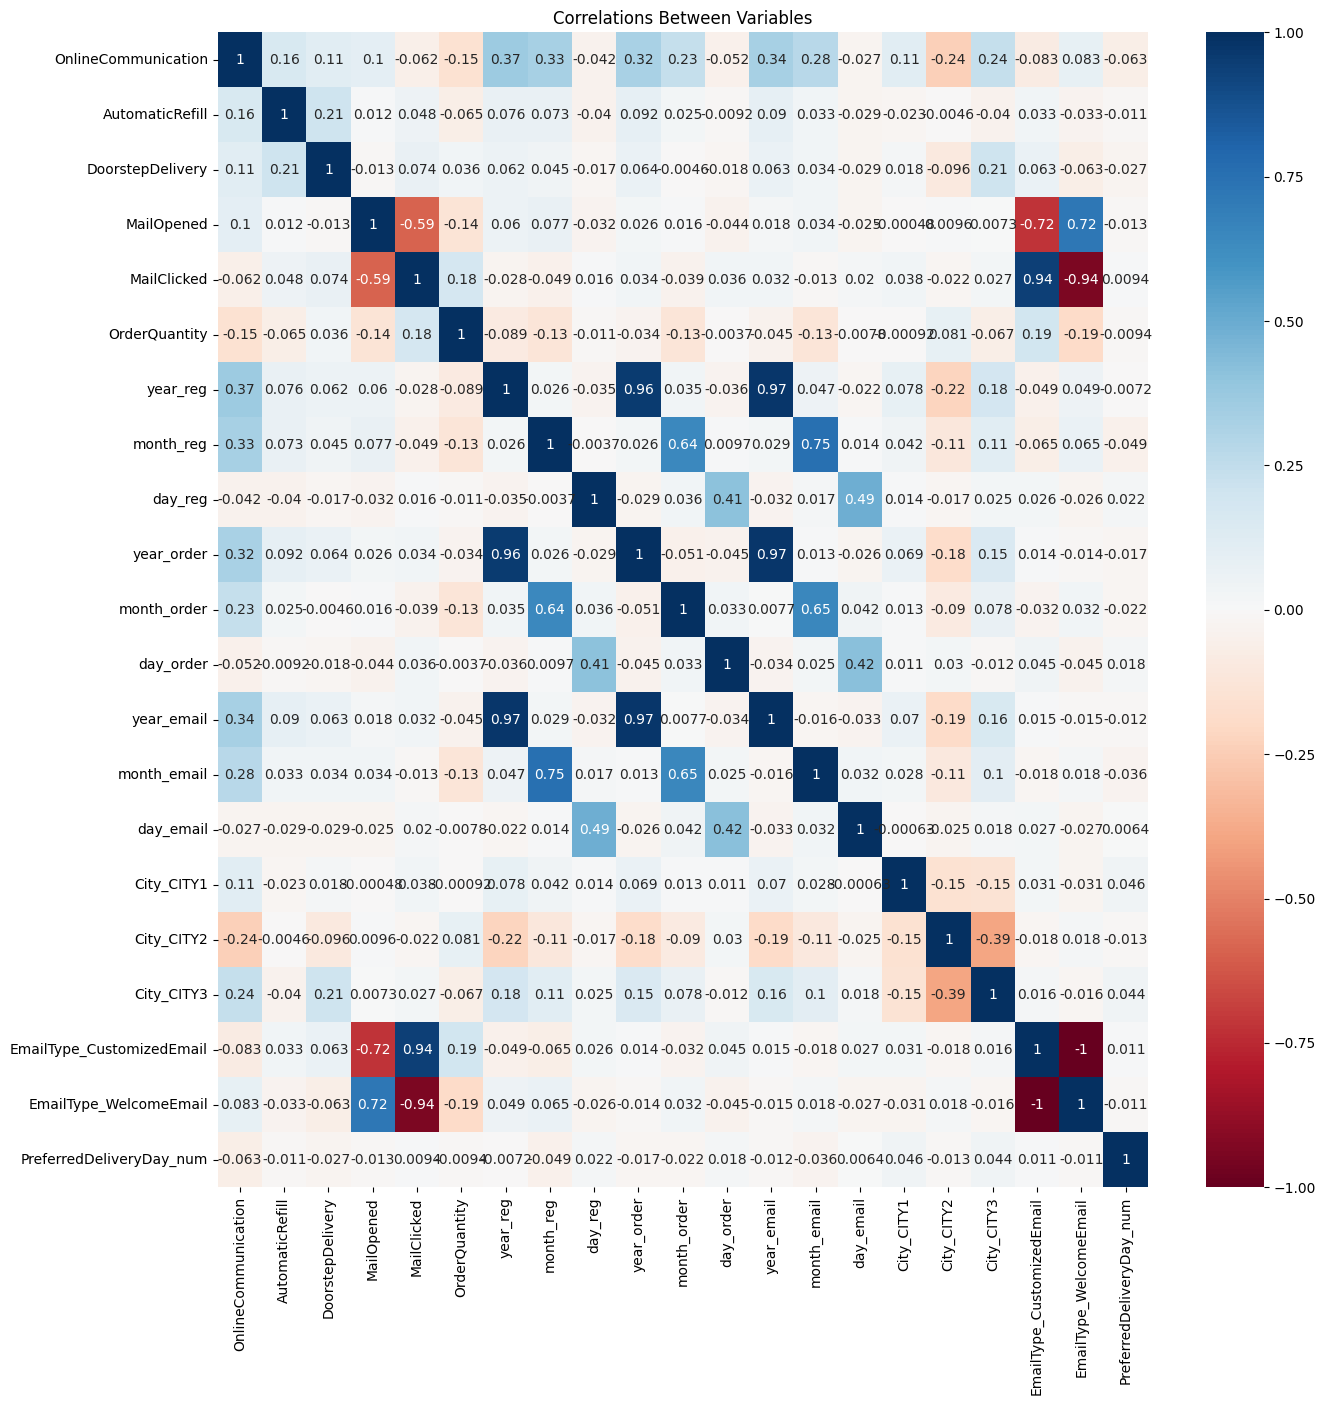

In [ ]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(test_df.corr(),annot=True, cmap="RdBu")
plt.title("Correlations Between Variables")
plt.show()

In [ ]:
test_df=test_df.drop(['year_reg','year_order','MailClicked'],axis=1)

# Evaluation on Test Data

In [ ]:
test_predictions=best_model.predict(test_df)

In [ ]:
test_predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
ids

773630     C39476
277869     C16188
28030      C20577
17730      C14740
192476     C16448
            ...  
1004273    C41552
960076     C29735
798356     C42064
692043     C31697
307282     C21003
Name: CustomerID, Length: 5906, dtype: object

In [ ]:
# assuming test_predictions is a list or numpy array and ids is a list of corresponding ids
submission = pd.DataFrame({'CustomerID': ids, 'RetentionPotential': test_predictions})
submission.head()

,CustomerID,RetentionPotential
773630,C39476,1
277869,C16188,1
28030,C20577,1
17730,C14740,1
192476,C16448,1


In [ ]:
submission.to_csv('submission.csv',index=False)

# CLustering


In [ ]:
dfc=df.drop('RetentionPotential_num',axis=1)
dfc

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,MailOpened,OrderQuantity,month_reg,day_reg,month_order,day_order,year_email,month_email,day_email,City_CITY1,City_CITY2,City_CITY3,EmailType_CustomizedEmail,EmailType_WelcomeEmail,PreferredDeliveryDay_num
773630,1,0,0,0,89,2,4,10,23,2013,9,21,0,1,0,1,0,0
277869,0,0,0,1,33,10,14,3,16,2012,4,22,0,0,0,1,0,0
28030,0,0,1,1,88,9,22,1,24,2011,2,6,0,1,0,1,0,0
3163458,0,0,0,1,81,11,9,10,10,2017,1,4,0,0,0,1,0,5
1241052,1,1,0,0,87,2,10,9,8,2012,8,9,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816603,1,0,0,1,41,9,18,9,18,2013,9,18,0,0,1,0,1,1
3075834,1,1,0,1,41,11,17,11,17,2013,11,17,0,1,0,0,1,1
2959214,1,0,0,1,41,10,11,10,11,2013,10,11,0,0,0,0,1,5
834375,0,0,0,1,51,6,22,3,22,2010,6,22,0,1,0,0,1,1


In [ ]:
from sklearn.preprocessing import StandardScaler
cols_to_standardize = ['OrderQuantity','month_reg','day_reg','month_order','day_order','year_email','month_email','day_email']
scaler = StandardScaler()
scaler.fit(dfc[cols_to_standardize])
dfc[cols_to_standardize] = scaler.transform(dfc[cols_to_standardize])
dfc

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,MailOpened,OrderQuantity,month_reg,day_reg,month_order,day_order,year_email,month_email,day_email,City_CITY1,City_CITY2,City_CITY3,EmailType_CustomizedEmail,EmailType_WelcomeEmail,PreferredDeliveryDay_num
773630,1,0,0,0,0.647706,-1.828938,-1.330227,0.574269,0.910971,-0.158436,0.301658,0.657765,0,1,0,1,0,0
277869,0,0,0,1,-0.801437,0.683472,-0.173723,-1.455090,0.082765,-0.688225,-1.197507,0.774143,0,0,0,1,0,0
28030,0,0,1,1,0.621828,0.369421,0.751480,-2.034907,1.029286,-1.218015,-1.797173,-1.087908,0,1,0,1,0,0
3163458,0,0,0,1,0.440686,0.997523,-0.751975,0.574269,-0.627125,1.960720,-2.097006,-1.320664,0,0,0,1,0,5
1241052,1,1,0,0,0.595951,-1.828938,-0.636325,0.284361,-0.863756,-0.688225,0.001825,-0.738773,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2816603,1,0,0,1,-0.594416,0.369421,0.288878,0.284361,0.319395,-0.158436,0.301658,0.308631,0,0,1,0,1,1
3075834,1,1,0,1,-0.594416,0.997523,0.173228,0.864178,0.201080,-0.158436,0.901324,0.192252,0,1,0,0,1,1
2959214,1,0,0,1,-0.594416,0.683472,-0.520674,0.574269,-0.508810,-0.158436,0.601491,-0.506017,0,0,0,0,1,5
834375,0,0,0,1,-0.335641,-0.572733,0.751480,-1.455090,0.792656,-1.747804,-0.597841,0.774143,0,1,0,0,1,1


In [ ]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5,n_init=10, random_state=1234)
kmeans.fit(dfc)
kmeans_clusters = kmeans.predict(dfc)
kmeans_clusters

array([3, 3, 3, ..., 0, 3, 4], dtype=int32)

In [ ]:
kmeans_results = pd.DataFrame({'CustomerID':train_ids , "kmeans_cluster" : kmeans_clusters} )
kmeans_results.head(20)

,CustomerID,kmeans_cluster
773630,C32109,3
277869,C32893,3
28030,C40881,3
3163458,C12364,0
1241052,C28289,3
1954914,C16158,4
2291430,C40243,3
1719313,C41226,0
3087955,C24344,1
3799146,C12827,2


Identify the no.of clusters


In [ ]:
n_clusters_range = range(1, 11)
inertia = []  #Inertia: Sum of squared distances of samples to their closest cluster center

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters,n_init=10)
    kmeans.fit(dfc)
    inertia.append(kmeans.inertia_)


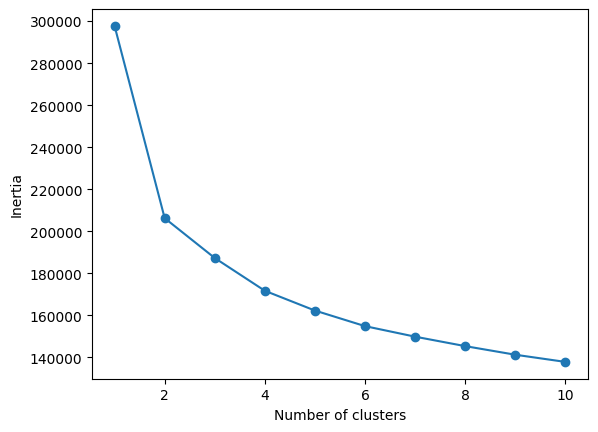

In [ ]:
plt.plot(n_clusters_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
best_kmeans = KMeans(n_clusters=5,n_init=10,random_state=1234)
best_kmeans.fit(dfc)
best_kmeans_labels = best_kmeans.predict(dfc)
best_kmeans_labels

array([3, 3, 3, ..., 0, 3, 4], dtype=int32)

In [ ]:
kmeans_results = pd.DataFrame({"CustomerID":train_ids,"kmeans_cluster":best_kmeans_labels})
kmeans_results.head(20)

,CustomerID,kmeans_cluster
773630,C32109,3
277869,C32893,3
28030,C40881,3
3163458,C12364,0
1241052,C28289,3
1954914,C16158,4
2291430,C40243,3
1719313,C41226,0
3087955,C24344,1
3799146,C12827,2


test data


In [ ]:
#fitting with k=4
best_kmeans2 = KMeans(n_clusters=5,n_init=10,random_state=1234)
best_kmeans2.fit(test_df)
best_kmeans_labels2 = best_kmeans2.predict(test_df)
best_kmeans_labels2

array([0, 4, 4, ..., 1, 0, 4], dtype=int32)

In [ ]:
kmeans_results2 = pd.DataFrame({"CustomerID":ids,"kmeans_cluster":best_kmeans_labels2})
kmeans_results2.head(20)

,CustomerID,kmeans_cluster
773630,C39476,0
277869,C16188,4
28030,C20577,4
17730,C14740,2
192476,C16448,4
906338,C25378,4
670737,C18188,4
990803,C24766,2
653418,C13362,2
46203,C21844,1
